In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [78]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


class RBFNetwork:
  def __init__(self, num_inputs, num_hidden, num_outputs):
    self.num_inputs = num_inputs
    self.num_hidden = num_hidden
    self.num_outputs = num_outputs
    self.mse_history = []
    self.centers = None
    self.weights = None
    self.scaler_x = None
    self.scaler_y = None
    self.sigma = None

  def _gaussian(self, x, c, s):
    return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * s ** 2))

  def _calculate_hidden_layer(self, X):
    G = np.zeros((X.shape[0], self.num_hidden))
    for i in range(self.num_hidden):
      for j in range(X.shape[0]):
        G[j, i] = self._gaussian(X[j], self.centers[i], self.sigma)
    return G

  def _mean_squared_error(self, y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

  def reset(self):
    self.weights = None
    self.centers = None
    self.mse_history = []
    self.scaler_x = None
    self.scaler_y = None

  def fit(self, X, y, learning_rate=0.01, precision=1e-6, max_epochs=1000, seed=None):
    if seed:
      np.random.seed(seed)

    self.scaler_x = StandardScaler()
    X_scaled = self.scaler_x.fit_transform(X)

    self.scaler_y = StandardScaler()
    y_scaled = self.scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    kmeans = KMeans(n_clusters=self.num_hidden, random_state=seed)
    kmeans.fit(X_scaled)
    self.centers = kmeans.cluster_centers_

    distances = cdist(self.centers, self.centers, 'euclidean')
    d_max = np.max(distances)
    self.sigma = d_max / np.sqrt(2 * self.num_hidden)

    G = self._calculate_hidden_layer(X_scaled)

    self.weights = np.random.randn(self.num_hidden, self.num_outputs) * 0.1

    prev_error = float('inf')
    epoch = 0
    while True:
      y_hat = np.dot(G, self.weights).flatten()
      error = y_scaled - y_hat
      self.weights += learning_rate * np.dot(G.T, error.reshape(-1, 1))

      mse = self._mean_squared_error(y_scaled, y_hat)
      self.mse_history.append(mse)

      if np.abs(prev_error - mse) <= precision:
        break

      prev_error = mse
      epoch += 1
      if epoch == max_epochs:
        print("Aviso: Máximo de épocas alcançado sem convergência.")
        break

  def predict(self, X):
    X_scaled = self.scaler_x.transform(X)
    G = self._calculate_hidden_layer(X_scaled)
    y_pred_scaled = np.dot(G, self.weights).flatten()
    y_pred = self.scaler_y.inverse_transform(
        y_pred_scaled.reshape(-1, 1)).flatten()
    return y_pred

  def evaluate(self, X, y_true):
    predictions = self.predict(X)
    mse = self._mean_squared_error(y_true, predictions)
    return predictions, mse

,x1,x2,x3,d
0,0.9532,0.6949,0.4451,0.8426
1,0.7954,0.8346,0.0449,0.6676
2,0.1427,0.0480,0.6267,0.3780
3,0.1516,0.9824,0.0827,0.4627
4,0.4868,0.6223,0.7462,0.8116
...,...,...,...,...
145,0.6345,0.5165,0.7139,0.8191
146,0.2453,0.5888,0.1559,0.4765
147,0.1174,0.5436,0.3657,0.4953
148,0.3667,0.3228,0.6952,0.6376


,x1,x2,x3,d
0,0.5102,0.7464,0.0860,0.5965
1,0.8401,0.4490,0.2719,0.6790
2,0.1283,0.1882,0.7253,0.4662
3,0.2299,0.1524,0.7353,0.5012
4,0.3209,0.6229,0.5233,0.6810
5,0.8203,0.0682,0.4260,0.5643
6,0.3471,0.8889,0.1564,0.5875
7,0.5762,0.8292,0.4116,0.7853
8,0.9053,0.6245,0.5264,0.8506
9,0.8149,0.0396,0.6227,0.6165


Rede RBF-1 - T1
Erro quadrático médio: 0.419
Épocas: 63
prediction=
 [0.56336996 0.69171364 0.51234692 0.48132864 0.65873907 0.48632978
 0.50793802 0.80603317 0.94270089 0.54009104 0.4403135  0.58254748
 0.45870803 0.62877456 0.84571721]

MSE = 0.03736818782546136
Erro relativo médio: 8.688
Variância: 0.022

Rede RBF-1 - T2
Erro quadrático médio: 0.482
Épocas: 82
prediction=
 [0.61179682 0.7398207  0.44434336 0.42617646 0.66272293 0.59967262
 0.54683154 0.81420464 0.80723222 0.59224785 0.41708335 0.62614393
 0.39900778 0.64608014 0.84338657]

MSE = 0.03582999609140106
Erro relativo médio: 7.534
Variância: 0.020

Rede RBF-1 - T3
Erro quadrático médio: 0.390
Épocas: 63
prediction=
 [0.71857816 0.65130477 0.56487375 0.59794813 0.6396351  0.53179796
 0.68239905 0.86266865 0.77654543 0.65373994 0.43169077 0.60155062
 0.52713708 0.79252945 0.83259797]

MSE = 0.02975530166799288
Erro relativo médio: 11.225
Variância: 0.014

Rede RBF-2 - T1
Erro quadrático médio: 0.249
Épocas: 96
prediction=
 

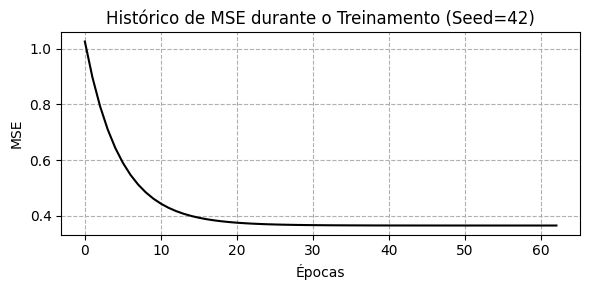

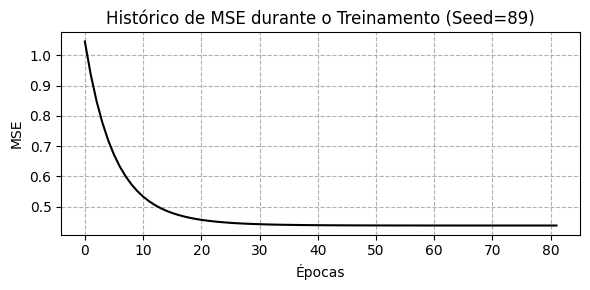

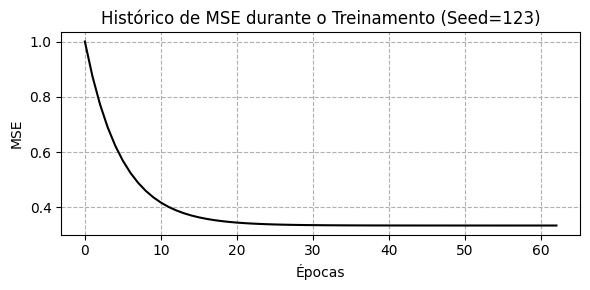

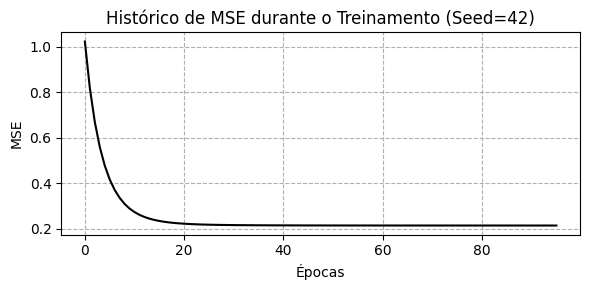

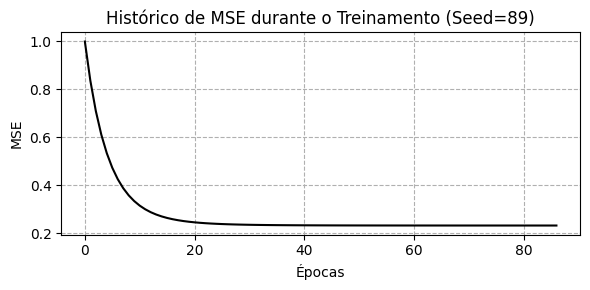

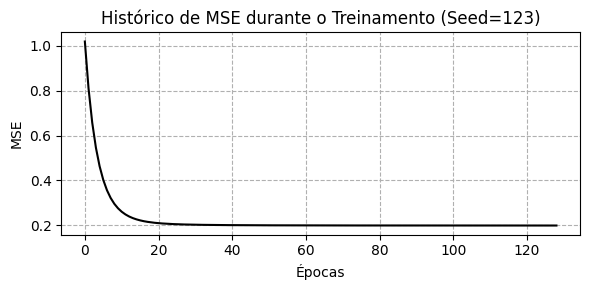

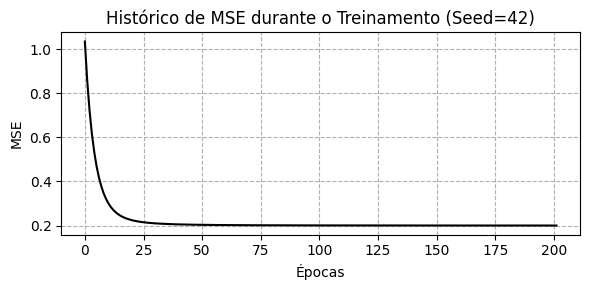

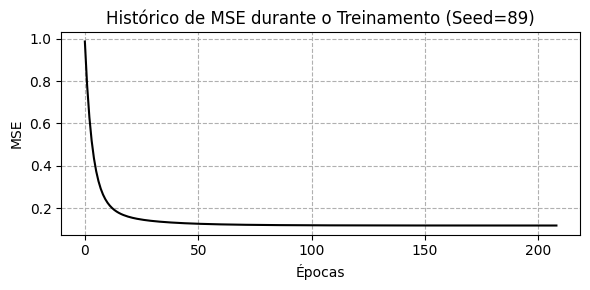

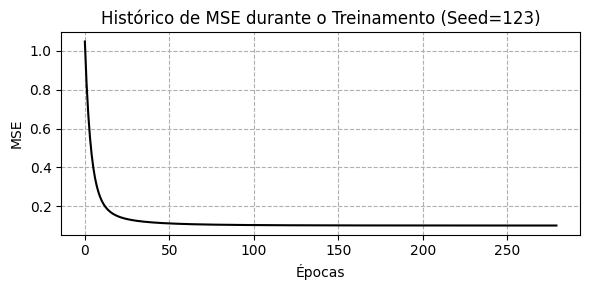

In [79]:
df_train = pd.read_excel("6.5_RNA.xls")
df_test = pd.read_csv('6.5_RNA_test.txt', delim_whitespace=True)

display(df_train)
display(df_test)

X_train = df_train[['x1', 'x2', 'x3']].values
y_train = df_train[['d']].values

X_test = df_test[['x1', 'x2', 'x3']].values
y_test = df_test[['d']].values

if __name__ == '__main__':

  rbf_params = [
      {'num_hidden': 5, 'seeds': [42, 89, 123]},
      {'num_hidden': 10, 'seeds': [42, 89, 123]},
      {'num_hidden': 15, 'seeds': [42, 89, 123]},
  ]

  for i, params in enumerate(rbf_params):
    num_hidden = params['num_hidden']
    seeds = params['seeds']

    # Criando uma única instância da RBF Network
    rbf_network = RBFNetwork(
        num_inputs=X_train.shape[1], num_hidden=num_hidden, num_outputs=1)

    for j, seed in enumerate(seeds):
      print(f'Rede RBF-{i + 1} - T{j + 1}')

      # Reseta a rede neural radial para cada nova semente
      rbf_network.reset()

      # Treinando a rede com taxa de aprendizado de 0.01 e precisão de 1e-6
      rbf_network.fit(X_train, y_train, learning_rate=0.01,
                      precision=1e-6, seed=seed)

      prediction, mse = rbf_network.evaluate(X_test, y_test)

      print(
          f'Erro quadrático médio: {np.mean(rbf_network.mse_history):.3f}')
      print(f'Épocas: {len(rbf_network.mse_history)}')

      print('prediction=\n', prediction)
      print()
      print('MSE =', mse)
      print(
          f'Erro relativo médio: {100 * np.mean(np.abs(prediction - y_test.flatten()) / y_test.flatten()):.3f}')
      print(
          f'Variância: {np.var(prediction):.3f}')

      # Plotando o erro quadrático médio em relação às épocas
      plt.figure(figsize=(6, 3))
      plt.plot(rbf_network.mse_history,
               linestyle='-', color='black', linewidth=1.5)
      plt.xlabel('Épocas')
      plt.ylabel('MSE')
      plt.title(f'Histórico de MSE durante o Treinamento (Seed={seed})')
      plt.grid(linestyle='--')

      # Salvar em formato EPS
      plt.tight_layout()
      # plt.savefig(f'Relatório/figures/p2-train-momentum.eps', format='eps')

      # Exibir apenas a parte relevante do gráfico
      # plt.close()

      print()

,x1,x2,x3,d
0,0.9532,0.6949,0.4451,0.8426
1,0.7954,0.8346,0.0449,0.6676
2,0.1427,0.0480,0.6267,0.3780
3,0.1516,0.9824,0.0827,0.4627
4,0.4868,0.6223,0.7462,0.8116
...,...,...,...,...
145,0.6345,0.5165,0.7139,0.8191
146,0.2453,0.5888,0.1559,0.4765
147,0.1174,0.5436,0.3657,0.4953
148,0.3667,0.3228,0.6952,0.6376


,x1,x2,x3,d
0,0.5102,0.7464,0.0860,0.5965
1,0.8401,0.4490,0.2719,0.6790
2,0.1283,0.1882,0.7253,0.4662
3,0.2299,0.1524,0.7353,0.5012
4,0.3209,0.6229,0.5233,0.6810
5,0.8203,0.0682,0.4260,0.5643
6,0.3471,0.8889,0.1564,0.5875
7,0.5762,0.8292,0.4116,0.7853
8,0.9053,0.6245,0.5264,0.8506
9,0.8149,0.0396,0.6227,0.6165


Rede RBF-1 - T1
Erro quadrático médio: 0.419
Épocas: 63
prediction=
 [0.56336996 0.69171364 0.51234692 0.48132864 0.65873907 0.48632978
 0.50793802 0.80603317 0.94270089 0.54009104 0.4403135  0.58254748
 0.45870803 0.62877456 0.84571721]

MSE = 0.03736818782546136
Erro relativo médio: 8.688
Variância: 0.022

Rede RBF-1 - T2
Erro quadrático médio: 0.482
Épocas: 82
prediction=
 [0.61179682 0.7398207  0.44434336 0.42617646 0.66272293 0.59967262
 0.54683154 0.81420464 0.80723222 0.59224785 0.41708335 0.62614393
 0.39900778 0.64608014 0.84338657]

MSE = 0.03582999609140106
Erro relativo médio: 7.534
Variância: 0.020

Rede RBF-1 - T3
Erro quadrático médio: 0.390
Épocas: 63
prediction=
 [0.71857816 0.65130477 0.56487375 0.59794813 0.6396351  0.53179796
 0.68239905 0.86266865 0.77654543 0.65373994 0.43169077 0.60155062
 0.52713708 0.79252945 0.83259797]

MSE = 0.02975530166799288
Erro relativo médio: 11.225
Variância: 0.014



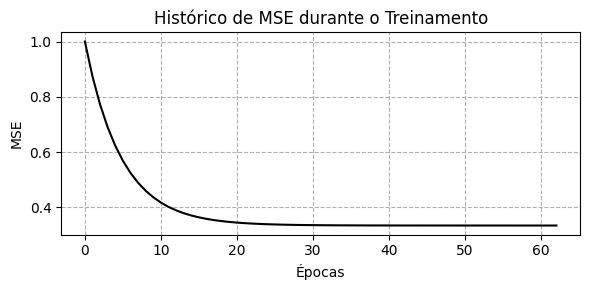

Melhor treinamento para RBF-1 foi com seed=123 com MSE=0.030

Rede RBF-2 - T1
Erro quadrático médio: 0.249
Épocas: 96
prediction=
 [0.59979048 0.66170379 0.5246528  0.52289712 0.63084426 0.55569521
 0.55648397 0.77804486 0.88662003 0.65862012 0.48874699 0.64028736
 0.44374747 0.73496524 0.82133631]

MSE = 0.03025657597242771
Erro relativo médio: 3.989
Variância: 0.015

Rede RBF-2 - T2
Erro quadrático médio: 0.277
Épocas: 87
prediction=
 [0.60394328 0.6675276  0.52031046 0.51868473 0.61790005 0.56008177
 0.55000687 0.76524298 0.88268313 0.67235042 0.48187187 0.64325758
 0.43685032 0.72466293 0.81933119]

MSE = 0.03024989854865947
Erro relativo médio: 4.367
Variância: 0.015

Rede RBF-2 - T3
Erro quadrático médio: 0.227
Épocas: 129
prediction=
 [0.59247445 0.6797687  0.50863127 0.51318985 0.62574465 0.50674669
 0.56425816 0.78431922 0.87146199 0.62203956 0.48186387 0.58359489
 0.45201358 0.78954091 0.8123676 ]

MSE = 0.03176194711288568
Erro relativo médio: 4.091
Variância: 0.017



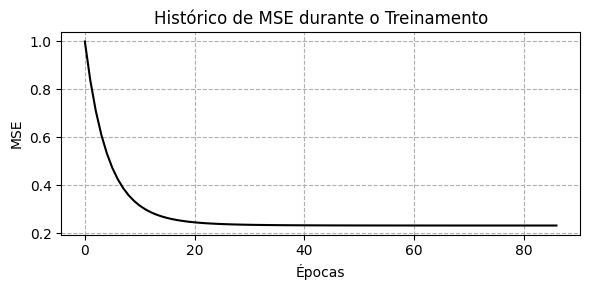

Melhor treinamento para RBF-2 foi com seed=89 com MSE=0.030

Rede RBF-3 - T1
Erro quadrático médio: 0.223
Épocas: 202
prediction=
 [0.59124105 0.6456326  0.52703702 0.52004832 0.70378697 0.55929498
 0.55257698 0.78239352 0.85489267 0.68257869 0.48598207 0.63126251
 0.43817301 0.72632761 0.81900596]

MSE = 0.029825665413257832
Erro relativo médio: 4.033
Variância: 0.015

Rede RBF-3 - T2
Erro quadrático médio: 0.142
Épocas: 209
prediction=
 [0.58744226 0.66097201 0.53664723 0.53704474 0.63167204 0.57540724
 0.54582516 0.8020209  0.86112878 0.68076308 0.50945468 0.65955539
 0.47794243 0.70835707 0.81138372]

MSE = 0.028031412254884158
Erro relativo médio: 5.246
Variância: 0.013

Rede RBF-3 - T3
Erro quadrático médio: 0.123
Épocas: 280
prediction=
 [0.58621841 0.660566   0.48881055 0.48511765 0.64098866 0.5451825
 0.55027136 0.76686597 0.87355543 0.65031156 0.50927776 0.63497206
 0.46119608 0.73502783 0.7915952 ]

MSE = 0.029610099523186446
Erro relativo médio: 3.644
Variância: 0.014



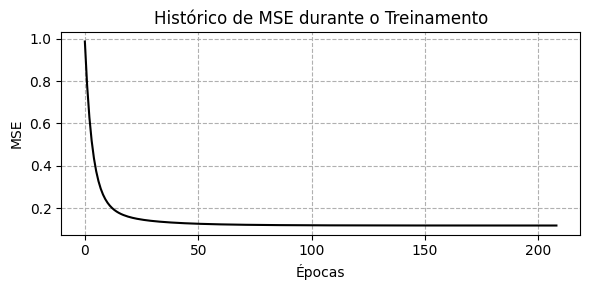

Melhor treinamento para RBF-3 foi com seed=89 com MSE=0.028



In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos arquivos
df_train = pd.read_excel("6.5_RNA.xls")
df_test = pd.read_csv('6.5_RNA_test.txt', delim_whitespace=True)

# Exibição dos dados
display(df_train)
display(df_test)

# Extração das variáveis de entrada e saída
X_train = df_train[['x1', 'x2', 'x3']].values
y_train = df_train[['d']].values

X_test = df_test[['x1', 'x2', 'x3']].values
y_test = df_test[['d']].values

if __name__ == '__main__':

  rbf_params = [
      {'num_hidden': 5, 'seeds': [42, 89, 123]},
      {'num_hidden': 10, 'seeds': [42, 89, 123]},
      {'num_hidden': 15, 'seeds': [42, 89, 123]},
  ]

  for i, params in enumerate(rbf_params):
    num_hidden = params['num_hidden']
    seeds = params['seeds']

    best_mse = float('inf')
    best_history = None
    best_seed = None

    for j, seed in enumerate(seeds):
      print(f'Rede RBF-{i + 1} - T{j + 1}')

      # Criando uma única instância da RBF Network
      rbf_network = RBFNetwork(
          num_inputs=X_train.shape[1], num_hidden=num_hidden, num_outputs=1)

      # Reseta a rede neural radial para cada nova semente
      rbf_network.reset()

      # Treinando a rede com taxa de aprendizado de 0.01 e precisão de 1e-6
      rbf_network.fit(X_train, y_train, learning_rate=0.01,
                      precision=1e-6, seed=seed)

      prediction, mse = rbf_network.evaluate(X_test, y_test)

      print(
          f'Erro quadrático médio: {np.mean(rbf_network.mse_history):.3f}')
      print(f'Épocas: {len(rbf_network.mse_history)}')

      print('prediction=\n', prediction)
      print()
      print('MSE =', mse)
      print(
          f'Erro relativo médio: {100 * np.mean(np.abs(prediction - y_test.flatten()) / y_test.flatten()):.3f}')
      print(f'Variância: {np.var(prediction):.3f}')

      if mse < best_mse:
        best_mse = mse
        best_history = rbf_network.mse_history
        best_seed = seed

      print()

    # Plotando o erro quadrático médio em relação às épocas para o melhor treinamento
    plt.figure(figsize=(6, 3))
    plt.plot(best_history, linestyle='-', color='black', linewidth=1.5)
    plt.xlabel('Épocas')
    plt.ylabel('MSE')
    plt.title(f'Histórico de MSE durante o Treinamento')
    plt.grid(linestyle='--')

    # Salvar em formato EPS
    plt.tight_layout()
    plt.savefig(
        f'report/figures/rbf-{i + 1}-best-training.eps', format='eps')
    plt.show()

    print(
        f'Melhor treinamento para RBF-{i + 1} foi com seed={best_seed} com MSE={best_mse:.3f}')
    print()